# Data


- date : all data are aggregated by date
- shown : the number of ads shown on a given day all over the web. Impressions are free.
- clicked : the number of clicks on the ads. The company will pay for clicks. 
- converted : the number of conversions on the site coming from ads. To be counted, a conversion as to happen on the same day as the ad click.
- avg_cost_per_click : on an average, how much it cost each of those clicks
- total_revenue : how much revenue came from the conversions
- ad : 40 different ad versions 

In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

In [60]:
data = pd.read_csv('ads.csv')

In [61]:
data

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1
...,...,...,...,...,...,...,...
2110,2015-11-18,78111,1326,37,1.01,553.36,ad_group_40
2111,2015-11-19,79857,1413,34,1.00,840.72,ad_group_40
2112,2015-11-20,75695,1332,35,1.09,468.95,ad_group_40
2113,2015-11-21,73761,1336,36,1.11,437.03,ad_group_40


In [62]:
len(data['ad'].unique())

40

In [63]:
data.isna().sum()

date                  0
shown                 0
clicked               0
converted             0
avg_cost_per_click    0
total_revenue         0
ad                    0
dtype: int64

In [64]:
data['date'] = pandas.to_datetime(data['date'])
  
data.describe()

,shown,clicked,converted,avg_cost_per_click,total_revenue
count,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000
mean,68299.844444,3056.077069,126.453901,1.373749,1966.517589
std,48884.821409,3783.579969,233.420826,0.754331,3942.018757
min,0.000000,0.000000,0.000000,0.000000,-200.150000
25%,28030.500000,744.000000,18.000000,0.760000,235.470000
50%,54029.000000,1392.000000,41.000000,1.400000,553.300000
75%,97314.500000,3366.500000,103.000000,1.920000,1611.495000
max,192507.000000,20848.000000,1578.000000,4.190000,39623.710000


In [65]:
# remove negative revenue from the dataset 
print("There are", len(data.query('total_revenue<0')), "observations with negative revenue")
data = data.query('total_revenue>=0')

There are 4 observations with negative revenue


In [66]:
#Check if clicked <= shown and converted <= clicked.
len(data.query('shown<clicked | clicked<converted'))

0

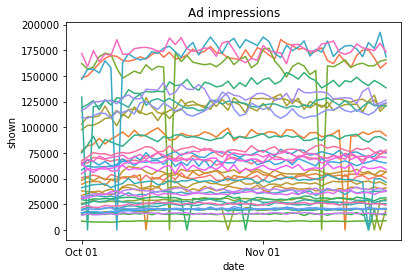

In [67]:
#plot the number of shown to see if there is any weird trend
g=sns.lineplot(x="date", y="shown",hue="ad", data=data, legend="")
g.xaxis.set_major_locator(mdates.MonthLocator())
g.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
g.set_title("Ad impressions") 
plt.show()

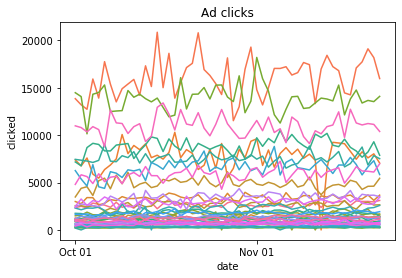

In [68]:
#remove zero impression data and plot the ads clicks 
data = data.query('shown>0')
g=sns.lineplot(x="date", y="clicked",hue="ad", data=data, legend="")
g.xaxis.set_major_locator(mdates.MonthLocator())
g.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
g.set_title("Ad clicks") 
plt.show()

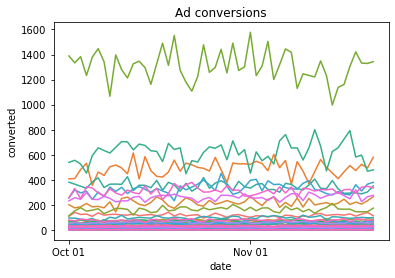

In [69]:
#remove zero click data and plot conversion 
data = data.query('clicked>0')
g=sns.lineplot(x="date", y="converted",hue="ad", data=data, legend="")
g.xaxis.set_major_locator(mdates.MonthLocator())
g.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
g.set_title("Ad conversions") 
plt.show()

In [70]:
#check dataset
data.describe(include = 'all')

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
count,2091,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091
unique,53,NaN,NaN,NaN,NaN,NaN,40
top,2015-10-05 00:00:00,NaN,NaN,NaN,NaN,NaN,ad_group_38
freq,40,NaN,NaN,NaN,NaN,NaN,53
first,2015-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-11-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,68853.852702,3088.744142,127.822573,1.387661,1989.242257,NaN
std,NaN,48799.535713,3792.468317,234.394500,0.746035,3958.838731,NaN
min,NaN,7494.000000,187.000000,0.000000,0.080000,0.000000,NaN
25%,NaN,28446.000000,756.500000,18.000000,0.780000,244.765000,NaN


In [71]:
# use CTR and profit to determine the best performing ads
# CTR = percentage of users who clicked the ads 
# profit = total revenue - total cost
data_rank = data.groupby('ad').apply(
             lambda x: pandas.Series({
                       'CTR': (x['clicked']/x['shown']).mean(),
                       'profits': (x['total_revenue']-x['clicked']*x['avg_cost_per_click']).mean(),
                       'count': x['shown'].mean()
  })
).reset_index()

#check minimum ad count just to make sure we have enough data for all groups
print(data_rank['count'].min())


8461.096153846154


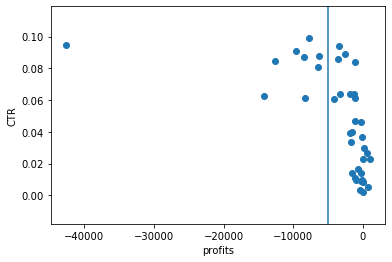

In [72]:
#Let's plot them
plt.scatter(data_rank['profits'], data_rank['CTR'])
plt.axvline(x=-5000)
plt.xlabel('profits')
plt.ylabel('CTR')
plt.show()

Define as threshold for profitability -5K. We will remove all ads below that, and then find the ads with the highest CTR among the remaining ones. Note that here we are considering short term revenue from the ad, and we are expecting that number to be negative. An ad should be positive when taking into account a user life time value (as usual, lifetime -> 1 yr).

In [73]:
#Remove ads that have profit < -5000 and find top 5 based on CTR among the other ones
print(data_rank.query('profits > -5000').sort_values('CTR', ascending=False).head(5))


             ad       CTR      profits          count
10  ad_group_19  0.094188 -3460.419038   19506.884615
20  ad_group_28  0.089191 -2644.280943   19886.339623
4   ad_group_13  0.085635 -3573.196275  161519.176471
27  ad_group_34  0.084257 -1189.270000   35371.622642
35   ad_group_5  0.063862 -3233.796538   52406.461538


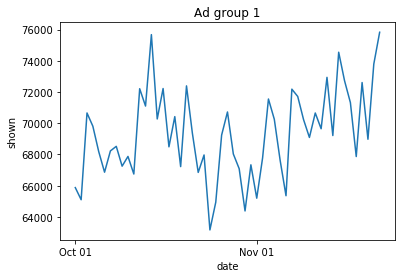

In [74]:
# predict how many ads will be shown on Dec, 15
import fbprophet
data_ad1 = data.query('ad==\"ad_group_1\"')[["date", "shown"]]
#plot
g=sns.lineplot(x="date", y="shown", data=data_ad1)
g.xaxis.set_major_locator(mdates.MonthLocator())
g.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
g.set_title("Ad group 1") 
plt.show()

In [75]:
# build time series model using prophet. 
  
#change column names and index
data_ad1['ds'] = data_ad1['date']
data_ad1.rename({'shown': 'y'}, axis=1, inplace=True)
data_ad1.set_index('date', inplace=True)

#build the model
ts = fbprophet.Prophet()
ts.fit(data_ad1)
  


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


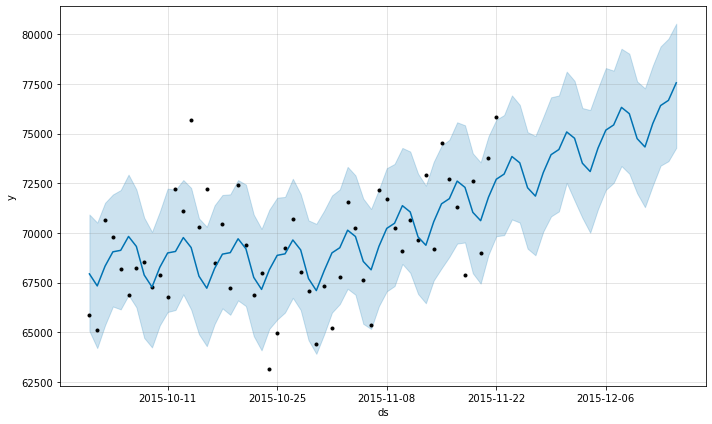

In [76]:
#make predictions
days_predictions = (pandas.to_datetime("2015-12-15")-data_ad1['ds'].max()).days
future_data = ts.make_future_dataframe(periods = days_predictions)
predictions = ts.predict(future_data)
  
#let's plot them
ts.plot(predictions)
plt.show()

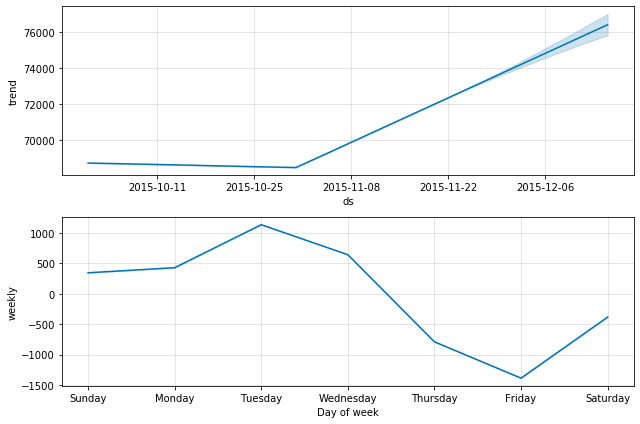

In [77]:
#plot the trend and seasonality
ts.plot_components(predictions)
plt.show()

The number starts going up from NOV and the model assume that the data will keep follow its lastest increasing trend. However, we cannot entirely trust the model result since we don't have enough data to capture the yearly seasonality. 



In [78]:
# make predictions for all ad groups 
predictions_all_groups = pandas.DataFrame({'ad_group':data['ad'].unique(),
                                           'date': pandas.to_datetime("2015-12-15")})
prediction_dec_15 = []                                           
   

for level in predictions_all_groups.ad_group:
    tmp = data.loc[data['ad']==level][["date", "shown"]]
    tmp['ds'] = tmp['date']
    tmp.rename({'shown': 'y'}, axis=1, inplace=True)
    tmp.set_index('date', inplace=True)
    ts_tmp = fbprophet.Prophet()
    ts_tmp.fit(tmp)
    days_predictions_tmp = (pandas.to_datetime("2015-12-15")-tmp['ds'].max()).days
    future_data_tmp = ts_tmp.make_future_dataframe(periods = days_predictions_tmp)
    predictions_tmp = ts_tmp.predict(future_data_tmp)
    prediction_dec_15.append(round(predictions_tmp['yhat'].iat[-1]))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [79]:
predictions_all_groups['predictions'] = prediction_dec_15
print(predictions_all_groups)

       ad_group       date  predictions
0    ad_group_1 2015-12-15        77558
1    ad_group_2 2015-12-15        50305
2    ad_group_3 2015-12-15       152888
3    ad_group_4 2015-12-15        94679
4    ad_group_5 2015-12-15        54750
5    ad_group_6 2015-12-15        40587
6    ad_group_7 2015-12-15        56988
7    ad_group_8 2015-12-15        47171
8    ad_group_9 2015-12-15       124642
9   ad_group_10 2015-12-15       127043
10  ad_group_11 2015-12-15        19964
11  ad_group_12 2015-12-15        28000
12  ad_group_13 2015-12-15       162073
13  ad_group_14 2015-12-15         8715
14  ad_group_15 2015-12-15        15773
15  ad_group_16 2015-12-15        30494
16  ad_group_17 2015-12-15       134101
17  ad_group_18 2015-12-15        89749
18  ad_group_19 2015-12-15        19889
19  ad_group_20 2015-12-15       120417
20  ad_group_21 2015-12-15        28320
21  ad_group_22 2015-12-15        26866
22  ad_group_23 2015-12-15        48616
23  ad_group_24 2015-12-15        37394


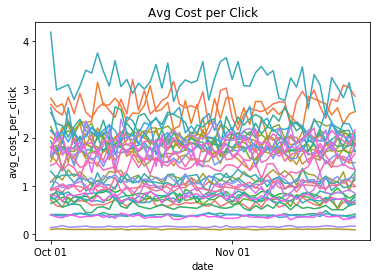

In [80]:
# use linear regression to predict the average cost per click

g=sns.lineplot(x="date", y="avg_cost_per_click",hue="ad", data=data, legend="")
g.xaxis.set_major_locator(mdates.MonthLocator())
g.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
g.set_title("Avg Cost per Click") 
plt.show()


In [81]:
import statsmodels.api as sm
coefficient = []
p_value = []



In [82]:
for level in data['ad'].unique():
    data_reg = data.loc[data['ad']==level][["date", "avg_cost_per_click"]]
    data_reg['date'] = (data_reg['date'] - data_reg['date'].min()).dt.days
    data_reg['intercept'] = 1
    lr = sm.OLS(data_reg['avg_cost_per_click'],data_reg.drop('avg_cost_per_click', axis=1)).fit()
    coefficient.append(lr.params[0])
    p_value.append(lr.pvalues[0])
    
lr_output = pandas.DataFrame({
                  'ad_group': data['ad'].unique(),
                  'coefficients': coefficient,
                  'p_value': p_value})


lr_output['cluster'] = np.where((lr_output['coefficients']>0) & (lr_output['p_value']<0.05/40), 'going_up',
                                np.where((lr_output['coefficients']<0) & (lr_output['p_value']<0.05/40), 'going_down',
                                         'flat'))
  
print(lr_output)                                         

       ad_group  coefficients   p_value cluster
0    ad_group_1      0.000926  0.145429    flat
1    ad_group_2     -0.000006  0.991095    flat
2    ad_group_3      0.002445  0.255564    flat
3    ad_group_4     -0.000577  0.804445    flat
4    ad_group_5     -0.001018  0.440261    flat
5    ad_group_6     -0.001734  0.077129    flat
6    ad_group_7     -0.002569  0.120068    flat
7    ad_group_8     -0.002689  0.026231    flat
8    ad_group_9      0.000044  0.434626    flat
9   ad_group_10     -0.000161  0.861238    flat
10  ad_group_11      0.000490  0.655742    flat
11  ad_group_12      0.000861  0.494787    flat
12  ad_group_13      0.000198  0.874992    flat
13  ad_group_14     -0.000776  0.168030    flat
14  ad_group_15      0.000406  0.533287    flat
15  ad_group_16     -0.000595  0.280798    flat
16  ad_group_17     -0.000027  0.894071    flat
17  ad_group_18      0.000625  0.691426    flat
18  ad_group_19     -0.002980  0.139845    flat
19  ad_group_20      0.000685  0.467957 

Here we are using linear regression to look at the overall trend. That is, old data points weigh just as much as the most recent ones. Had we focused only on the most recent data, we obviously might have found different results.
Looks like everything is flat. W/o using the Bonferroni correction, we would have likely found some significant ads.
